# Amazon Web Services - Use Case 1




## Decision Tree Model 

In this notebook, we build, train, and tune by [__card_clients.xls__] a [__ Logistic Regressions__] to predict the __target_label__ field ( Did the person default? (Yes = 1, No = 0)"pay the creidt card amount or not"). 

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Exploratory Data Analysis</a>
3. <a href="#3">Select features to build the model</a>
4. <a href="#4">Training and test datasets</a>
5. <a href="#5">Data processing with Pipeline and ColumnTransformer</a>
6. <a href="#6">Train and tune a classifier</a>
7. <a href="#7">Test the classifier</a>
8. <a href="#8">Improvement ideas</a>
9. <a href="#9">Summary and conclusion </a>


In [3]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [4]:
import numpy as np                                
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime                 
import sys                                        





In [5]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_excel('card_clients.xls',header=1)

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 25)


## 2. <a name="2">Exploratory Data Analysis</a>
(<a href="#0">Go to top</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [6]:
# Print the first five rows
# NaN means missing data
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (30000, 25)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [9]:
df.rename(columns={'default payment next month':'default'},inplace=True)

In [10]:

df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
df.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    331
MARRIAGE     323
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64

In [12]:
#find if data is correct using value count
display (df.SEX.value_counts(),
df.EDUCATION.value_counts(),
df.MARRIAGE.value_counts(),
df.AGE.value_counts(),
df.AGE.max(),
df.AGE.min(),
df.PAY_0.value_counts(),
df.default.value_counts(),
df.query('AGE>100')
)

female    18112
male      11888
Name: SEX, dtype: int64

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

29     1605
27     1477
28     1408
30     1395
26     1255
       ... 
74        1
149       1
152       1
126       1
79        1
Name: AGE, Length: 63, dtype: int64

267

21

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

0    23364
1     6636
Name: default, dtype: int64

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
4011,4012,50000,male,university,single,149,0,0,0,0,...,9430,9638,9801,3473,2294,328,350,323,312,0
4116,4117,70000,female,high school,single,126,0,0,0,0,...,11578,13408,12302,1500,2000,2000,2000,1000,2000,1
5395,5396,490000,female,university,married,152,-1,-1,-1,-1,...,7000,0,4341,22595,762,7000,0,4341,1061,0
6963,6964,470000,male,graduate school,married,140,2,0,0,0,...,138087,109094,106004,10000,5214,4500,5000,4200,5000,1
7318,7319,360000,female,graduate school,single,228,0,0,0,0,...,144485,145601,140336,5708,6059,5009,5021,5027,100017,0
8940,8941,200000,female,high school,married,267,0,0,0,0,...,150852,151996,147690,17014,15019,15000,15000,10000,10000,0
29496,29497,80000,male,university,married,235,-1,-1,-1,-1,...,397,42857,41864,2702,1246,397,42860,7,118,0


#### Target distribution

Let's check our target distribution.

Text(0.5, 0, 'Default payment?')

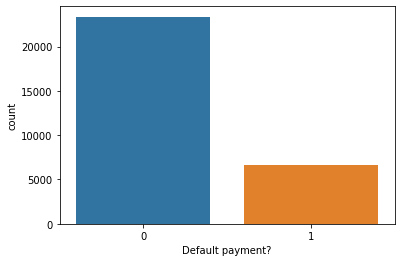

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.countplot(data=df,x='default');
plt.xlabel('Default payment?')

We can see from the target plot above that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s).


In [91]:
prop=len(df.query('default==0'))/len(df.default)
print ('percent of non default={}'.format(prop))

percent of non default=0.7788150568465976


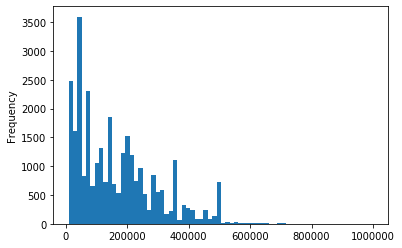

In [14]:
df['LIMIT_BAL'].plot.hist(bins=70)
plt.show()

In [15]:
#limit balance is less than 800000 but there is high values need to be rescaled
#it needs to be scaled to minimize the values


Text(0.5, 1, 'dataset correlation')

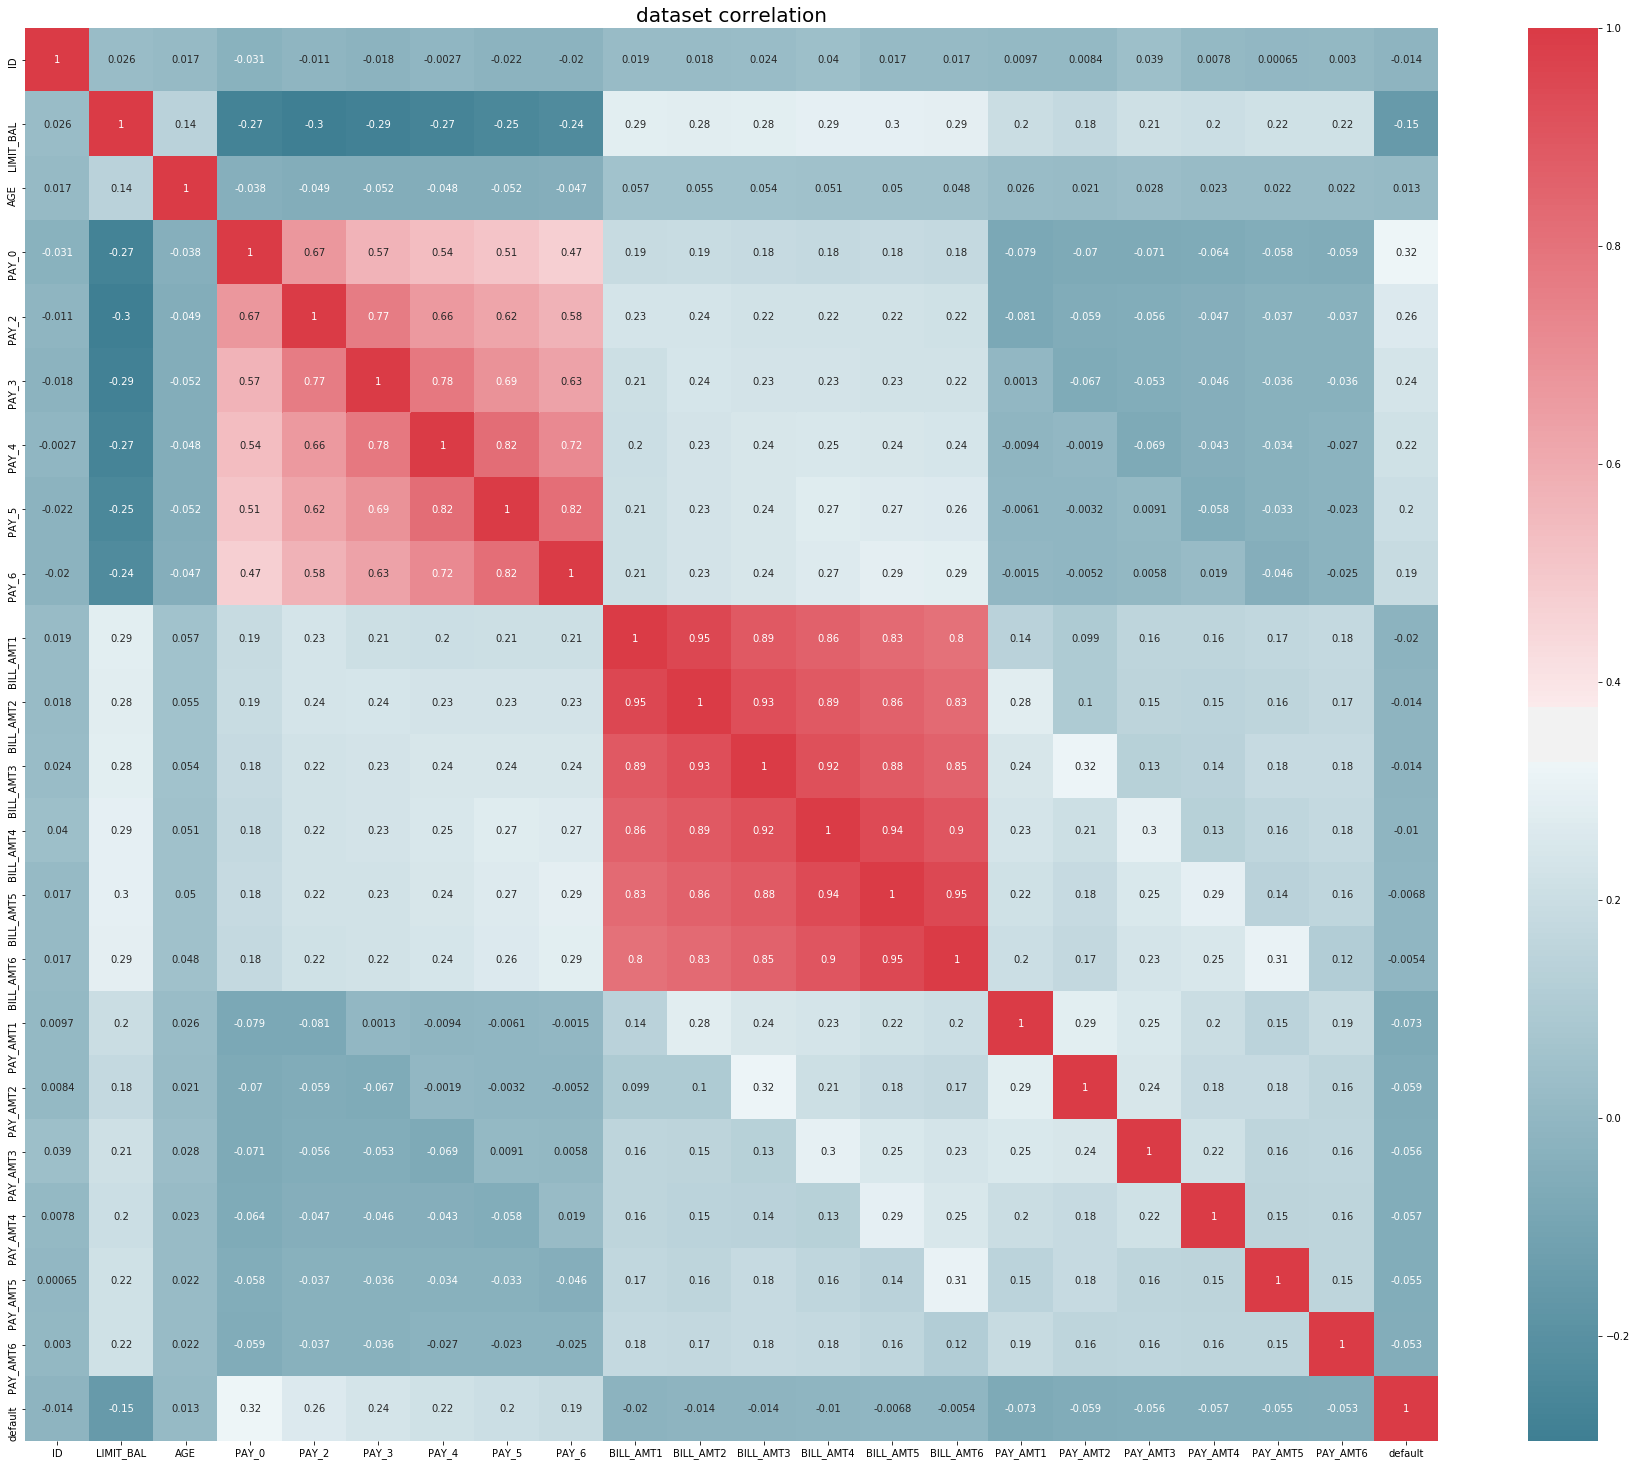

In [16]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [17]:
#we can notice correlation between Bill_AMT1 to Bill_AMT6 
#also a weak corr between our target feature and (AGE,ID,BILLAMT1,2,3,4,5,6)

In [18]:
# Number of unique elements in dataset
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        5
MARRIAGE         3
AGE             63
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

In [19]:
# What columns are in dataset?
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

(0, 80)

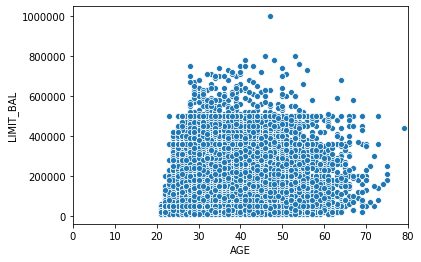

In [20]:
sb.scatterplot(data=df,x='AGE',y='LIMIT_BAL');
plt.xlim(0,80)
#plt.yscale('log')
#ticks = [0.5, 1, 5, 10, 50, 100, 500,1000]
# Convert ticks into string values, to be displaye dlong the x-axis
#labels = ['{}'.format(v) for v in ticks]
# Apply x-ticks
#plt.yticks(ticks, labels);
#plt.ylabel('Duration in minutes');
#plt.xticks(rotation=15);

In [21]:
#there is a strong non linear RELAtion between AGE and Limit of balance

In [22]:
#remove duplicates
df.drop_duplicates(inplace=True)

## 3. <a name="3">Select features to build the model</a>
(<a href="#0">Go to top</a>)

We build a model using selected features (except __ID). 

For Data preparation and cleaning the following has been noticed :

1-Education and marriage contains null values and 0 values i will impute null using mode value and change 0 to other

2-age has 7 rows with values above 100(outliers) so this is not correct i will drop them 

3-drop id column will not be useful

4-one hot encoding for education, gender ,marriage

5-scale limit balance 


In [23]:
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']





numeric_categorical_features =  ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


text_categorical_features =['SEX', 'EDUCATION', 'MARRIAGE']
label_feature = ['default']

In [24]:
label = 'default'

In [25]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

#### checking for numerical features outliers

In [26]:
for c in numeric_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

LIMIT_BAL
(9009.999, 109000.0]     12498
(109000.0, 208000.0]      7880
(208000.0, 307000.0]      5059
(307000.0, 406000.0]      2759
(406000.0, 505000.0]      1598
(505000.0, 604000.0]       127
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(802000.0, 901000.0]         0
(901000.0, 1000000.0]        1
Name: LIMIT_BAL, dtype: int64
AGE
(20.753, 45.6]    25327
(45.6, 70.2]       4651
(70.2, 94.8]         15
(94.8, 119.4]         0
(119.4, 144.0]        2
(144.0, 168.6]        2
(168.6, 193.2]        0
(193.2, 217.8]        0
(217.8, 242.4]        2
(242.4, 267.0]        1
Name: AGE, dtype: int64
BILL_AMT1
(-166710.09199999998, -52570.9]        2
(-52570.9, 60438.2]                21885
(60438.2, 173447.3]                 6007
(173447.3, 286456.4]                1534
(286456.4, 399465.5]                 397
(399465.5, 512474.6]                 143
(512474.6, 625483.7]                  27
(625483.7, 738492.8]                   3
(738492.8, 851501.9]                   1
(85

Let's check missing values for these numerical features.

In [27]:
print(df[numeric_features].isna().sum())

LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


In [28]:
#Remove Age above 80
df.drop(df[df['AGE']>80].index,axis=0,inplace=True)

#### Cleaning categorical features 

Let's also examine the categorical features.

In [29]:
for c in text_categorical_features:
    print(c)
    print(df[c].value_counts())

SEX
female    18108
male      11885
Name: SEX, dtype: int64
EDUCATION
university         14027
graduate school    10583
high school         4914
others               124
0                     14
Name: EDUCATION, dtype: int64
MARRIAGE
single     15961
married    13655
0             54
Name: MARRIAGE, dtype: int64


In [30]:
#1- Education contains null and 0 >  will be included in others category 

df.EDUCATION.fillna(0,inplace=True)
df.EDUCATION.replace(0,'others',inplace=True)
df.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school'],
      dtype=object)

In [31]:
#also for marital status will be replace with the mode of this column which is single
df.MARRIAGE.fillna(0,inplace=True)
df.MARRIAGE.replace(0,'single',inplace=True)
df.MARRIAGE.unique()

array(['married', 'single'], dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         29993 non-null  int64 
 1   LIMIT_BAL  29993 non-null  int64 
 2   SEX        29993 non-null  object
 3   EDUCATION  29993 non-null  object
 4   MARRIAGE   29993 non-null  object
 5   AGE        29993 non-null  int64 
 6   PAY_0      29993 non-null  int64 
 7   PAY_2      29993 non-null  int64 
 8   PAY_3      29993 non-null  int64 
 9   PAY_4      29993 non-null  int64 
 10  PAY_5      29993 non-null  int64 
 11  PAY_6      29993 non-null  int64 
 12  BILL_AMT1  29993 non-null  int64 
 13  BILL_AMT2  29993 non-null  int64 
 14  BILL_AMT3  29993 non-null  int64 
 15  BILL_AMT4  29993 non-null  int64 
 16  BILL_AMT5  29993 non-null  int64 
 17  BILL_AMT6  29993 non-null  int64 
 18  PAY_AMT1   29993 non-null  int64 
 19  PAY_AMT2   29993 non-null  int64 
 20  PAY_AMT3   29993 non-null  i

Converting categoricals into useful numerical features, will also have to wait until after the train/test split.

one last step in data preparation is to change all categorical feature with one hot encoding 

In [33]:
df[['graduate school', 'high school', 'others', 'university']]=pd.get_dummies(df['EDUCATION'])

In [34]:
df[['married', 'single']]=pd.get_dummies(df['MARRIAGE'])

In [35]:
df[['female','male']]=pd.get_dummies(df['SEX'])


In [36]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default,graduate school,high school,others,university,married,single,female,male
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,1,0,0,0,1,1,0,1,0
1,2,120000,female,university,single,26,-1,2,0,0,...,2000,1,0,0,0,1,0,1,1,0
2,3,90000,female,university,single,34,0,0,0,0,...,5000,0,0,0,0,1,0,1,1,0
3,4,50000,female,university,married,37,0,0,0,0,...,1000,0,0,0,0,1,1,0,1,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,679,0,0,0,0,1,1,0,0,1
5,6,50000,male,graduate school,single,37,0,0,0,0,...,800,0,1,0,0,0,0,1,0,1
6,7,500000,male,graduate school,single,29,0,0,0,0,...,13770,0,1,0,0,0,0,1,0,1
7,8,100000,female,university,single,23,0,-1,-1,0,...,1542,0,0,0,0,1,0,1,1,0
8,9,140000,female,others,married,28,0,0,2,0,...,1000,0,0,0,1,0,1,0,1,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,0,0,1,0,0,0,1,0,1


In [37]:
#drop marriage, sex,education , id columns
df.drop(['ID','SEX', 'EDUCATION', 'MARRIAGE'],axis=1,inplace=True)

In [38]:
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']





numeric_categorical_features =  ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'graduate school', 'high school', 'others',
       'university', 'married', 'single', 'female', 'male']



label_feature = ['default']

In [39]:
print(len(df.columns))

29


In [40]:
all_features = numeric_features  + numeric_categorical_features + label_feature #+ date_features

In [41]:
print(len(all_features))

29


## 4. <a name="4">Training and test datasets</a>
(<a href="#0">Go to top</a>)

We split our dataset into training (90%) and test (10%) subsets using sklearn's [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [42]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df[all_features], test_size=0.2, shuffle=True, random_state=23)
#val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)


## 5. <a name="5">Data processing with Pipeline and ColumnTransformer</a>
(<a href="#0">Go to top</a>)

Let's build a more complex pipeline today. We first build separate pipelines to handle the numerical, categorical, and text features, and then combine them into a composite pipeline along with an estimator, a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) here.

   * For the numerical features pipeline, the __numerical_processor__ below, we impute missing values with the mean using sklearn's SimpleImputer, followed by a MinMaxScaler (don't have to scale features when using Decision Trees, but it's a good idea to see how to use more data transforms). If different processing is desired for different numerical features, different pipelines should be built - just like shown below for the two text features.
   
   
   * In the categoricals pipeline, the __categorical_processor__ below, we impute with a placeholder value (no effect here as we already encoded the 'nan's), and encode with sklearn's OneHotEncoder. If computing memory is an issue, it is a good idea to check categoricals' unique values, to get an estimate of many dummy features will be created by one-hot encoding. Note the __handle_unknown__ parameter that tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation/and or test set that was not present in the initial training set.
   
   
The selective preparations of the dataset features are then put together into a collective ColumnTransformer, to be finally used in a Pipeline along with an estimator. This ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a validation dataset via cross-validation or making predictions on a test dataset in the future.

In [43]:



### COLUMN_TRANSFORMER ###
##########################


In [44]:
df.astype(int)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,default,graduate school,high school,others,university,married,single,female,male
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,0,0,1,1,0,1,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,1,0,0,0,1,0,1,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,0,0,0,1,0,1,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,0,0,0,1,1,0,1,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1000,0,0,1,0,0,1,0,0,1
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,0,0,1,0,0,0,1,0,1
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,3100,1,0,0,0,1,0,1,0,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1804,1,0,1,0,0,1,0,0,1


In [45]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#df[['LIMIT_BAL']] = min_max_scaler.fit_transform(df[['LIMIT_BAL']])
#min_max_scaler = MinMaxScaler()
#X_test['LIMIT_BAL'] = min_max_scaler.fit_transform(X_test['LIMIT_BAL'])

In [46]:
df.head()
train_data, test_data = train_test_split(df[all_features], test_size=0.2, shuffle=True, random_state=23)

## 6. <a name="6">Train and tune a classifier</a>
(<a href="#0">Go to top</a>)

Let's first train and test the above composite pipeline on the train and the test sets.  

In [50]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
def train(model,xtrain,ytrain):
    model.fit(xtrain,ytrain)
    
model = LogisticRegression(random_state=23)
# Get train data to train the pipeline
X_train = train_data[numeric_features + numeric_categorical_features]
y_train = train_data[label]
X_test = test_data[numeric_features + numeric_categorical_features]
y_test = test_data[label]

# Fit the Pipeline to training data
train(model,X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset


Evaluate

In [51]:
def predict_batches(model, features, labels, split=200):
    
    predictions =  model.predict(features)

    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = precision_score(labels, predictions)
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = recall_score(labels, predictions)
    print(f'Recall: {recall}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=np.round(predictions), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
    sb.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 
    

Accuracy: 0.7886314385730955
Precision: 0.0
Recall: 0.0


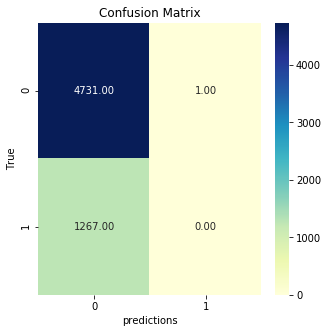

In [52]:
predict_batches(model, X_test, y_test)


## 8. <a name="28">Improvement Ideas</a>
(<a href="#0">Go to top</a>)

* Remove un important features and correlated features
* Try ensemble models such as XGBoost
* consider techniques for unbalanced data(oversampling/ SMOTE and undersampling)
* Scale Limit balance feature (didn't give any result)


In [53]:
#pip install xgboost

In [54]:


xgbmodel = XGBClassifier(random_state=23)
train(xgbmodel,X_train, y_train)
#xgbmodel.fit(X_train, y_train)

[16:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
#X_test = test_data[numeric_features + numeric_categorical_features]
#y_test = test_data[label]
#y_pred = xgbmodel.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [56]:
#Evaluate
#print(classification_report(predictions, y_test))
#from sklearn.metrics import accuracy_score,precision_score, recall_score
#from sagemaker.predictor import csv_serializer, json_deserializer,numpy_deserializer
#from sagemaker.predictor import csv_deserializer



Accuracy: 0.8214702450408401
Precision: 0.6368715083798883
Recall: 0.35990528808208366


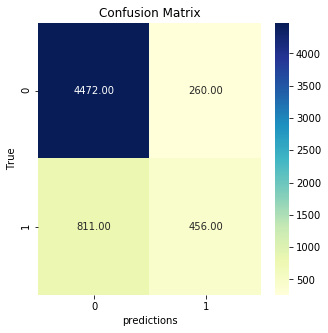

In [57]:
predict_batches(xgbmodel, X_test, y_test)

In [58]:
#drop un important features such as  (AGE,BILLAMT1,2,3,4,5,6)
X_train.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE'],axis=1,inplace=True)

In [59]:
X_test.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','AGE'],axis=1,inplace=True)

[16:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8268044674112353
Precision: 0.663323782234957
Recall: 0.3654301499605367


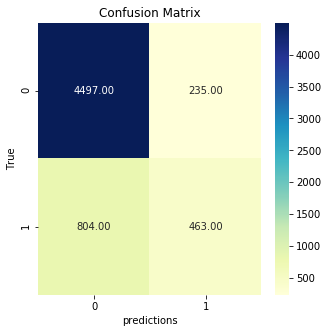

In [60]:

train(xgbmodel,X_train, y_train)
predict_batches(xgbmodel, X_test, y_test)

Accuracy: 0.8088014669111518
Precision: 0.6013513513513513
Recall: 0.2809786898184688


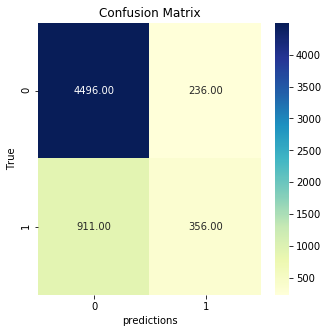

In [61]:
#model = LogisticRegression(random_state=23)
model.fit(X_train,y_train)
predict_batches(model, X_test, y_test)
#model.score(X_train, y_train)

After Removing un important features logistic regression and xgboost  accuracy has been improved by 0.5%

In [62]:
#Tune hyper parameter manaul tuning for xgboost to improve the performence 
xgbmodel=XGBClassifier(
 learning_rate =0.01,
 max_depth=6)
xgbmodel.fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision}')
    
 # Calculate recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

[16:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.00%
Precision: 0.6920684292379471
Recall: 0.35122336227308604


after tuning hyper parameters for xgboost classifier the accuracy increased by 0.5% again but not much improvement in recall and percision

In [63]:
#conda install scikit-learn

In [84]:
all_features=['LIMIT_BAL','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'graduate school', 'high school', 'others', 'university', 'married', 'single', 'female', 'male']
print(all_features)

['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'graduate school', 'high school', 'others', 'university', 'married', 'single', 'female', 'male']


In [79]:
#Try to use SMOT as solution for unalanced data
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=23)
X_res, y_res = sm.fit_resample(X_train, y_train)
smote_df = pd.DataFrame(X_res,columns=all_features) 
smote_df['default'] = y_res # Enter your code here
smote_df.head()
smote_df.shape

(37254, 22)

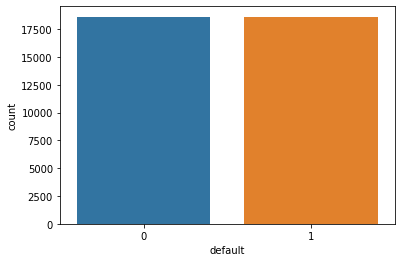

In [77]:
sb.countplot(data=smote_df,x='default')

In [85]:
smote_df.head()

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0,PAY_2,PAY_3,...,PAY_6,graduate school,high school,others,university,married,single,female,male,default
0,200000,165,1520,413,300,0,1638,-1,-1,-1,...,0,0,0,0,1,1,0,1,0,0
1,20000,0,25,2000,1000,2000,1000,3,3,2,...,0,0,1,0,0,0,1,0,1,1
2,290000,2000,2604,215917,3685,3700,3786,0,-1,-1,...,0,0,0,1,0,1,0,0,1,0
3,60000,1500,1500,2000,2000,2000,2000,0,0,0,...,0,0,0,0,1,1,0,0,1,1
4,200000,896,0,0,0,0,0,1,-1,-1,...,-2,1,0,0,0,0,1,1,0,0


In [86]:
#train and evaluate the model again 
#split data
train_data, test_data = train_test_split(smote_df, test_size=0.2, shuffle=True, random_state=23)
X_train = train_data[all_features]
y_train = train_data[label]
X_test = test_data[all_features]
y_test = test_data[label]


In [87]:
#fit
xgbmodel=XGBClassifier(
 learning_rate =0.01,
 max_depth=6)
xgbmodel.fit(X_train, y_train)



[16:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Accuracy: 0.8526372299020266
Precision: 0.8935226264418811
Recall: 0.8036711891460495


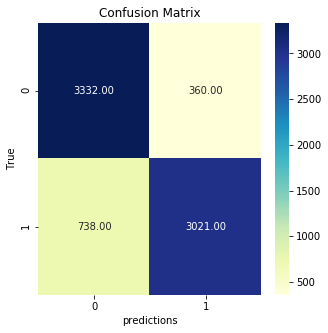

In [89]:
predict_batches(xgbmodel, X_test, y_test)

We can see that after applying over sampling accuracy , percision and recall had high imporvements

## 9.<a name="9"> Summary and conclusion </a>

problem formulation :we need to predict if the client will pay his default next month or not so this is a binary classification problem i will use logistic regrssion algorithm

### Steps:

#### EXploratory data analysis :
* dataset contains (30000 records, 25 feature)most of features are numeric except    for(marriage,sex, education which is text categorical features)
* 1- data is imbalanced (77% is non default and 23% is default)
* 2- correlation between Bill_AMT1 to Bill_AMT6 
* 3- a weak corr between our target feature and (AGE,ID,BILLAMT1,2,3,4,5,6)
* 4- outliers in AGE feature 17 records
* 5- nan and out of category records in marriage and education 
#### Preprocessing:
   1-Education and marriage contains null values and 0 values i will impute null using mode value and change 0 to other
    2-age has 7 rows with values above 100(outliers) so this is not correct i will drop them
    3-drop id column will not be useful
    4-apply one hot encoding for education, gender ,marriage to be numeric
    5- divide to train and test sets
#### Training:
    i used logistic regression at first
#### Evaluation:
Accuracy: 0.78,percision:0 , recall :0 
i was interested in percision to be improved as this case is senstive to false positives
#### improvments:
* Try models such as XGBoost -->Accuracy:0.82/Precision:0.63/Recall: 0.35
* Remove unimportant and correlated features--> Accuracy: 0.826/Precision: 0.66/Recall:0.36
    (not much improvement )
* Manual tuning of hyper parameters such as learning rate and max depth:Accuracy: 83 %-Precision: 0.69 / Recall: 0.35
* consider techniques for unbalanced data(oversampling/ SMOTE )-->made  a huge improvment at the    final result
* Scale Limit balance feature (didn't give any result)--> didn't give any result 

#### Evaluation after improvments:
after applying the previous techniques , training and evaluation after each step solving the issue of unbalanced data gave the best perfomence as the percision went up from 0.66 to 0.89 

Final Reuslt :Accuracy: 0.85
Precision: 0.89
Recall: 0.80